In [1]:
import os
import shutil
import numpy as np

In [2]:
# Source and target directories
source_dir = r"D:\MedSAM2\prostate_mri_us_biopsy"
target_image_dir = r"D:\MedSAM2\organized_data\images"
target_mask_dir = r"D:\MedSAM2\organized_data\masks"

In [15]:
# make directories
os.makedirs(target_image_dir, exist_ok=True)
os.makedirs(target_mask_dir, exist_ok=True)

In [20]:
def split_img_masks(source_dir, target_image_dir, target_mask_dir):
    """
    Separates images and masks from individual patient folders and add them to respective image/mask folder
    :param source_dir: directory that has all images and masks currently
    :param target_image_dir: directory for images to be copied to
    :param target_mask_dir: directory for masks to be copied to
    """
    # Iterate over each patient folder
    for patient_folder in os.listdir(source_dir):
        patient_path = os.path.join(source_dir, patient_folder)

        if os.path.isdir(patient_path):
            # Iterate through subfolders in patient folder
            for subfolder in os.listdir(patient_path):
                subfolder_path = os.path.join(patient_path, subfolder)

                if os.path.isdir(subfolder_path):
                    for subfolder2 in os.listdir(subfolder_path):
                        subfolder2_path = os.path.join(subfolder_path, subfolder2)
                        # Need to find MRI folders
                        if os.path.isdir(subfolder2_path) and 'MR' in os.path.basename(subfolder2_path):
                            # Create subfolder for each MRI folder
                            batch_name = os.path.basename(subfolder2_path)
                            patient_mri_dir = os.path.join(target_image_dir, patient_folder, batch_name)
                            os.makedirs(patient_mri_dir, exist_ok=True)

                            # Move MRI DICOM files into appropriate folder
                            for file in os.listdir(subfolder2_path):
                                if file.endswith(".dcm"): # PRETTY SURE THEYRE ALL DICOM
                                    shutil.copy(os.path.join(subfolder2_path, file), os.path.join(patient_mri_dir, file))

                        # Find seg mask folder
                        elif os.path.isdir(subfolder2_path) and "SEG" in os.path.basename(subfolder2_path):
                            # Create subfolder for each MRI folder
                            patient_seg_dir = os.path.join(target_mask_dir, patient_folder, batch_name)
                            os.makedirs(patient_seg_dir, exist_ok=True)

                            # Move seg mask DICOM files
                            for file in os.listdir(subfolder2_path):
                                if file.endswith(".dcm"):
                                    shutil.copy(os.path.join(subfolder2_path, file), os.path.join(patient_seg_dir, file))

In [ ]:
split_img_masks(source_dir, target_image_dir, target_mask_dir)

In [44]:
image_dir = "/home/jovyan/Medical-SAM2/data/T2img_Mask/T2MR_nrrd"
mask_dir = "/home/jovyan/Medical-SAM2/data/T2img_Mask/T2_prostate_mask"

train_mask_dir = "/home/jovyan/Medical-SAM2/data/T2img_Mask/Training/masks"
train_img_dir = "/home/jovyan/Medical-SAM2/data/T2img_Mask/Training/images"

test_mask_dir = "/home/jovyan/Medical-SAM2/data/T2img_Mask/Test/masks"
test_img_dir = "/home/jovyan/Medical-SAM2/data/T2img_Mask/Test/images"

val_mask_dir = "/home/jovyan/Medical-SAM2/data/T2img_Mask/Validation/masks"
val_img_dir = "/home/jovyan/Medical-SAM2/data/T2img_Mask/Validation/images"

In [45]:
# make directories
os.makedirs(train_mask_dir, exist_ok=True)
os.makedirs(train_img_dir, exist_ok=True)
os.makedirs(test_mask_dir, exist_ok=True)
os.makedirs(test_img_dir, exist_ok=True)
os.makedirs(val_mask_dir, exist_ok=True)
os.makedirs(val_img_dir, exist_ok=True)

In [46]:
test_ratio = 0.15
val_ratio = 0.15
# Creating partitions of the data into training, test, and validation
all_mask_names = os.listdir(mask_dir)
np.random.shuffle(all_mask_names)
train_mask_names, val_mask_names, test_mask_names = np.split(np.array(all_mask_names), 
                                                             [int(len(all_mask_names)*(1-(val_ratio + test_ratio))), 
                                                              int(len(all_mask_names)*(1-val_ratio)),
                                                              ])

In [47]:
# List of file names for mask in each set
train_mask_names = [mask_dir + '\\' + name for name in train_mask_names.tolist()]
val_mask_names = [mask_dir + '\\' + name for name in val_mask_names.tolist()]
test_mask_names = [mask_dir + '\\' + name for name in test_mask_names.tolist()]

print('Total images: '+ str(len(all_mask_names)))
print('Training: '+ str(len(train_mask_names)))
print('Validation: '+  str(len(val_mask_names)))
print('Testing: '+ str(len(test_mask_names)))

Total images: 1017
Training: 711
Validation: 153
Testing: 153


In [54]:
def copy_dir(dir_list, og_dir, dest_dir):
    """
    Copies folders from a list of folder paths to a new destination
    :param dir_list: list of directories to be copied
    :param og_dir: path to directory where folders are currently stored
    :param dest_dir: path to directory where folders should be copied to 
    """
    for folder_path in dir_list:
        # Get the folder name from the full path
        folder_name = os.path.basename(folder_path)
        og_path = os.path.join(og_dir, folder_name)
        dest_path = os.path.join(dest_dir, folder_name)
        
        # Copy entire directory tree to the destination
        if os.path.isdir(og_path):  # Check if it's a directory
            shutil.copytree(og_path, dest_path)
        else:
            print(f"Skipping non-directory: {og_path}")

In [55]:
# Copy training, test, and validation masks to respective folders
copy_dir(train_mask_names, mask_dir, train_mask_dir)
copy_dir(test_mask_names, mask_dir, test_mask_dir)
copy_dir(val_mask_names, mask_dir, val_mask_dir)

FileNotFoundError: [Errno 2] No such file or directory: '/home/jovyan/Medical-SAM2/data/T2img_Mask/T2_prostate_mask\\Prostate-MRI-US-Biopsy-0186-ProstateSurface-seriesUID-1.3.6.1.4.1.14519.5.2.1.186773235172006919900828860887136845549.nii.gz'

In [43]:
# Copy training, test, and validation images to respective folders
# Uses list of mask names b/c copy_dir() takes basename of file list
copy_dir(train_mask_names, image_dir, train_img_dir)
copy_dir(test_mask_names, image_dir, test_img_dir)
copy_dir(val_mask_names, image_dir, val_img_dir)

In [18]:
def remove_MRI(source_dir):
    """
    Removes extra MRI folders and move T2 weighted out of folder so they can be accessed directly from patient folders
    """
    for patient_dir in os.listdir(source_dir):
        patient_path = os.path.join(source_dir, patient_dir)
        
        if os.path.isdir(patient_path):  # Ensure it's a directory
            # Remove the subfolders with less than 60 files
            for folder in os.listdir(patient_path):
                folder_path = os.path.join(patient_path, folder)
                if os.path.isdir(folder_path) and len(os.listdir(folder_path)) < 60:
                    try:
                        shutil.rmtree(folder_path)  # Remove the entire folder tree
                        print(f"Deleted: {folder_path}")
                    except Exception as e:
                        print(f"Error deleting {folder_path}: {e}")
                else:
                    move_files(folder_path, patient_path)

In [6]:
def move_files(folder_path, patient_path):
    """
    Moves files from witin a folder 
    """
    if os.path.isdir(folder_path):
        for file_name in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file_name)
            dest_path = os.path.join(patient_path, file_name)
            try:
                shutil.move(file_path, dest_path)  # Move file to the parent folder
                print(f"Moved: {file_path} -> {dest_path}")
            except Exception as e:
                print(f"Error moving {file_path}: {e}")
        # After moving all files, remove the now-empty subfolder
        try:
            os.rmdir(folder_path)  # Remove the empty subfolder
            print(f"Deleted empty folder: {folder_path}")
        except Exception as e:
            print(f"Error deleting folder {folder_path}: {e}")

In [ ]:
# Remove unnecessary MRIs - only keep T2
remove_MRI(train_img_dir)
remove_MRI(test_img_dir)
remove_MRI(val_img_dir)

In [9]:
def move_masks(mask_dir):
    for patient_dir in os.listdir(mask_dir):
        patient_path = os.path.join(mask_dir, patient_dir)
        
        if os.path.isdir(patient_path):  # Ensure it's a directory
            for folder in os.listdir(patient_path):
                folder_path = os.path.join(patient_path, folder)

                move_files(folder_path, patient_path)


In [ ]:
# Move masks to patient folder and remove now empty folder
move_masks(train_mask_dir)
move_masks(test_mask_dir)
move_masks(val_mask_dir)

In [2]:
# moving files into Medical-SAM2\data folder
train_dir = r"D:\MedSAM2\organized_data\Training"
test_dir = r"D:\MedSAM2\organized_data\Test"
val_dir = r"D:\MedSAM2\organized_data\Validation"

shutil.move(train_dir, r"D:\MedSAM2\Medical-SAM2\data\prostate_mri")  # Move file to the parent folder
shutil.move(test_dir, r"D:\MedSAM2\Medical-SAM2\data\prostate_mri")  # Move file to the parent folder
shutil.move(val_dir, r"D:\MedSAM2\Medical-SAM2\data\prostate_mri")  # Move file to the parent folder


'D:\\MedSAM2\\Medical-SAM2\\data\\prostate_mri\\Validation'

In [13]:
import os
import shutil
def remove_empty_folders(base_path):
    """
    Recursively removes empty folders from the dataset directory structure.
    """
    for root, dirs, files in os.walk(base_path, topdown=False):  # Start from the bottom-most folder
        for dir in dirs:
            dir_path = os.path.join(root, dir)
            # Check if the directory is empty
            if len(os.listdir(dir_path)) != 60:  # If folder is empty
                print(f"Removing empty folder: {dir_path}")
                shutil.rmtree(dir_path)

In [16]:
train_image = "./prostate_mri/Test/images"
remove_empty_folders(train_image)

Removing empty folder: ./prostate_mri/Test/images/Prostate-MRI-US-Biopsy-0971
Removing empty folder: ./prostate_mri/Test/images/Prostate-MRI-US-Biopsy-0488
Removing empty folder: ./prostate_mri/Test/images/Prostate-MRI-US-Biopsy-0674
Removing empty folder: ./prostate_mri/Test/images/Prostate-MRI-US-Biopsy-0342
Removing empty folder: ./prostate_mri/Test/images/Prostate-MRI-US-Biopsy-0224
Removing empty folder: ./prostate_mri/Test/images/Prostate-MRI-US-Biopsy-0956
Removing empty folder: ./prostate_mri/Test/images/Prostate-MRI-US-Biopsy-0213
Removing empty folder: ./prostate_mri/Test/images/Prostate-MRI-US-Biopsy-0135
Removing empty folder: ./prostate_mri/Test/images/Prostate-MRI-US-Biopsy-0596
Removing empty folder: ./prostate_mri/Test/images/Prostate-MRI-US-Biopsy-0202
Removing empty folder: ./prostate_mri/Test/images/Prostate-MRI-US-Biopsy-0178
Removing empty folder: ./prostate_mri/Test/images/Prostate-MRI-US-Biopsy-0525
Removing empty folder: ./prostate_mri/Test/images/Prostate-MRI-U

In [7]:
def sync_mask_with_image(image_base_path, mask_base_path):
    """
    Deletes patient folders from the mask directory if they don't have a corresponding folder in the image directory.
    
    Parameters:
        image_base_path (str): Path to the base image directory.
        mask_base_path (str): Path to the base mask directory.
    """
    # Get the list of patient folders in the image directory
    image_patients = set(os.listdir(image_base_path))
    
    # Iterate over all patient folders in the mask directory
    for patient_folder in os.listdir(mask_base_path):
        mask_patient_path = os.path.join(mask_base_path, patient_folder)
        
        # Check if the folder exists in the image directory
        if patient_folder not in image_patients:
            print(f"No corresponding image folder for {patient_folder}. Removing mask folder: {mask_patient_path}")
            shutil.rmtree(mask_patient_path)  # Remove the mask folder

In [19]:
image_dir = "./prostate_mri/Test/images"
mask_dir = "./prostate_mri/Test/masks"
sync_mask_with_image(image_dir, mask_dir)

No corresponding image folder for Prostate-MRI-US-Biopsy-0971. Removing mask folder: ./prostate_mri/Test/masks/Prostate-MRI-US-Biopsy-0971
No corresponding image folder for Prostate-MRI-US-Biopsy-0488. Removing mask folder: ./prostate_mri/Test/masks/Prostate-MRI-US-Biopsy-0488
No corresponding image folder for Prostate-MRI-US-Biopsy-0674. Removing mask folder: ./prostate_mri/Test/masks/Prostate-MRI-US-Biopsy-0674
No corresponding image folder for Prostate-MRI-US-Biopsy-0342. Removing mask folder: ./prostate_mri/Test/masks/Prostate-MRI-US-Biopsy-0342
No corresponding image folder for Prostate-MRI-US-Biopsy-0224. Removing mask folder: ./prostate_mri/Test/masks/Prostate-MRI-US-Biopsy-0224
No corresponding image folder for Prostate-MRI-US-Biopsy-0956. Removing mask folder: ./prostate_mri/Test/masks/Prostate-MRI-US-Biopsy-0956
No corresponding image folder for Prostate-MRI-US-Biopsy-0213. Removing mask folder: ./prostate_mri/Test/masks/Prostate-MRI-US-Biopsy-0213
No corresponding image fold

In [33]:
image_base_path = "./prostate_mri/Training/images"
mask_base_path = "./prostate_mri/Training/masks"

In [27]:
mask = "/home/jovyan/Medical-SAM2/temp/val/Prostate-MRI-US-Biopsy-1070/14/mask_pred.png"

In [30]:
from PIL import Image
import numpy as np
mask_img = Image.open(mask)

In [31]:
mask_array = np.array(mask_img)

In [36]:
np.unique(mask_array)
mask_array.shape

(369, 369, 4)

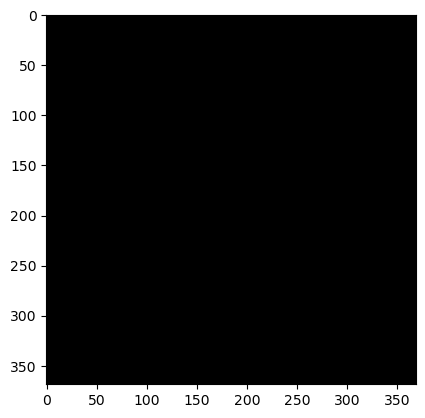

In [34]:
from matplotlib import pyplot as plt
plt.imshow(mask_array, interpolation='nearest')
plt.show()